In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from matplotlib.pyplot import style
style.use('ggplot')

*In this exercise we are selling house and we want to know what a good market price would be*

In [2]:
data = pd.read_csv('ex1data2.txt', header=None,
                   names=['size', 'num.bed', 'price'])

**House size about 1000 times number of bedrooms.When features differ by orders of magnitude, first performing feature scaling can make gradient descent converge
much more quickly.** <br>
Mean normalization: $$x_i = \frac{x_i - u_i}{s_i} $$ <br>
*Pandas and numpy std different. By default pandas use unbiased estimator N-1 in denominator while numpy by default does not*

In [3]:
data.head()

,size,num.bed,price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [4]:
m = len(data['price'])
X_mat = data.iloc[:, [0, 1]]
mean = X_mat.mean()
std = X_mat.std()
X_mat = ((X_mat - mean)/std).to_numpy()
X_mat = np.hstack((np.ones((m, 1)), X_mat))
Y_mat = np.asanyarray(data[['price']])

In [5]:
# Initialize some parameters
theta = np.zeros((3, 1))
alpha = 0.01
num_iters = 400

In [6]:
# Computing Cost
def CostFunction(x, y, theta):
    cost = 1/(2*m) * np.sum((x @ theta - y) ** 2)
    return cost

In [7]:
# Gradient Descent (Multiple)
def GradientDescent(x, y, theta, alpha, num_iters, m):
    J = []
    for i in range(0, num_iters):
        hypothesis = x @ theta
        error = hypothesis - y
        x_sum = error.T @ x
        theta = theta - (alpha/m) * x_sum.T
        cost = CostFunction(x, y, theta)
        J.append(cost)
    return theta, J

In [8]:
theta, J = GradientDescent(X_mat, Y_mat, theta, alpha, num_iters, m)

**Determining if gradient descent is working properly**

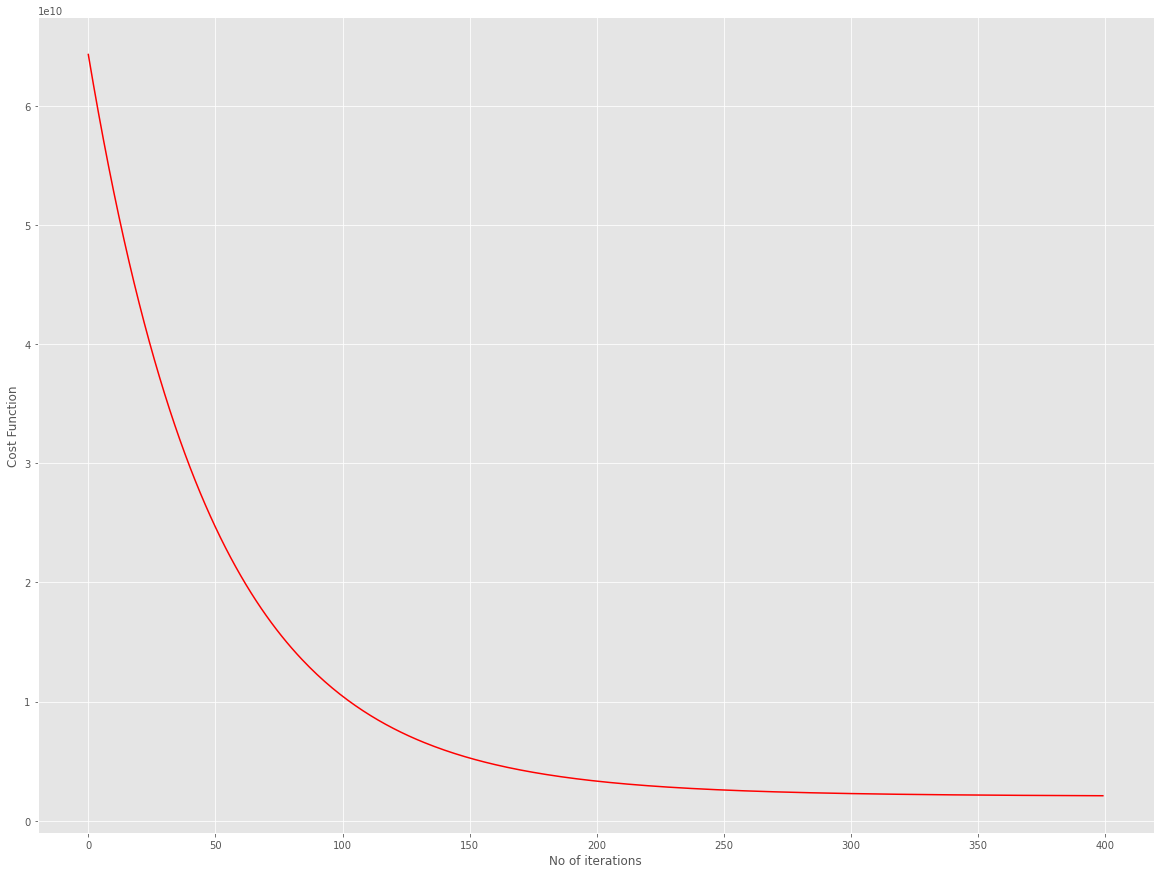

In [9]:
plt.figure(figsize=(20, 15))
plt.plot(J, c='Red')
plt.xlabel('No of iterations')
plt.ylabel('Cost Function')
plt.show()

**Now we estimate the price of a 1650 sq-ft, 3 br house
We need to normalize the data (Feature scaling)**

In [10]:
x1 = (1650 - mean[0])/std[0]
x2 = (3 - mean[1])/std[1]
Estimated_Price = np.array([1, x1, x2]) @ theta
print('Our estimated price is', round(Estimated_Price[0], 2))

Our estimated price is 289314.62


**Now we use normal equation to find theta, no need to feature scale**

Normal Equation: $$\theta = (X^T X)^{-1} X^T Y$$<br>
- No need choose $\alpha$
- Don't need iterate
- Slow if n is very large

In [11]:
X_norm = data.iloc[:, [0, 1]].to_numpy()
X_norm = np.hstack((np.ones((m, 1)), X_norm))

In [12]:
X_1 = np.linalg.inv(X_norm.T @ X_norm)
X_2 = X_norm.T @ Y_mat
theta_norm = X_1 @ X_2

In [13]:
print('Our theta value is', theta_norm)

Our theta value is [[89597.9095428 ]
 [  139.21067402]
 [-8738.01911233]]


*Now let's see our predicted value for 1650 sq-ft, 3 br house*

In [14]:
predicted_norm = np.array([1, 1650, 3]) @ theta_norm
print('Predicted price for normal equation is $', round(predicted_norm[0], 2))

Predicted price for normal equation is $ 293081.46


**Now we use sklearn for linear regression with multiple variables**

In [15]:
regr = linear_model.LinearRegression()

**We notice that it is the same as normal equation, hence predicted price will be the same**

In [16]:
allX = np.asanyarray(data[['size','num.bed']])
allY = np.asanyarray(data[['price']])
regr.fit(allX, allY)
print('The intercept is', regr.intercept_[0])
print('The coefficients are', regr.coef_[0][0],',', regr.coef_[0][1])

The intercept is 89597.90954279754
The coefficients are 139.2106740176255 , -8738.019112327827
